In [46]:
'''
Notebook is intended for Coursera Capstone project
Battle of neighborboods between New York & Sanfrancisco
'''
import pandas as pd
import numpy as np
get_ipython().system('conda install -c conda-forge folium=0.5.0 --yes')
import folium
print('Folium installed and imported!')

!conda install -c anaconda xlrd --yes
print('Import XLRD')


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.11.28-py36_0 anaconda --> 2019.11.28-py36_0 conda-forge

The following packages will be DOWNGRADED:

    openssl: 1.1.1-h7b6447c_0  anaconda --> 1.1.1d-h516909a_0 conda-forge


certifi-2019.11.28   | 149 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Folium installed and imported!
Solving e

In [188]:
File_name = 'USCrimeOffenseDatabase.xls'
df_input_data = pd.read_excel(File_name,sheet_name='15tbl08',skiprows=range(3),skipfooter=10)

In [189]:
# Replace / Rename the cell values
df_input_data.rename(columns={'Motor\nvehicle\ntheft':'VehicleTheft','Property\ncrime' : 'PropertyCrime'}, inplace=True) 

In [192]:
# Select only relevant parameters which will mostly likely affect our decision
df_input_sel = df_input_data[['City','Population','PropertyCrime','Burglary','VehicleTheft']]
df_input_sel

,City,Population,PropertyCrime,Burglary,VehicleTheft
0,Abbeville,2610,76.0,24.0,2.0
1,Adamsville,4414,330.0,38.0,14.0
2,Addison,748,28.0,11.0,2.0
3,Alabaster,31821,534.0,64.0,29.0
4,Albertville,21534,723.0,197.0,64.0
...,...,...,...,...,...
9390,Sundance,1252,15.0,8.0,1.0
9391,Thermopolis,3024,12.0,1.0,4.0
9392,Torrington,6762,116.0,24.0,4.0
9393,Wheatland,3666,94.0,31.0,7.0


In [193]:
#In order to simplify the crime data processing, create a new column for sum of all crimes
df_input_sel['TotalCrime'] = df_input_sel['PropertyCrime']+df_input_sel['VehicleTheft']+df_input_sel['Burglary']

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [194]:
#Sort the selected data as per population
df_input_pop = df_input_sel.sort_values("Population", axis = 0, ascending = False, inplace = False, na_position ='last')

In [195]:
#For simplifying the visualization, normalize the total crime. Such as crime rate for 100K population
df_input_pop['CrimeRatePer1000'] = df_input_pop['TotalCrime']/1000
df_input_pop.head()

,City,Population,PropertyCrime,Burglary,VehicleTheft,TotalCrime,CrimeRatePer1000
5595,New York,8550861,129860.0,14098.0,7386.0,151344.0,151.344
697,Los Angeles,3962726,93503.0,16160.0,16152.0,125815.0,125.815
1854,Chicago,2728695,80395.0,13151.0,10222.0,103768.0,103.768
8188,Houston,2275221,100053.0,19859.0,13560.0,133472.0,133.472
7167,Philadelphia,1567810,49345.0,8083.0,5034.0,62462.0,62.462


In [196]:
# For NaN values use "0"
df_input_pop.fillna(0)

,City,Population,PropertyCrime,Burglary,VehicleTheft,TotalCrime,CrimeRatePer1000
5595,New York,8550861,129860.0,14098.0,7386.0,151344.0,151.344
697,Los Angeles,3962726,93503.0,16160.0,16152.0,125815.0,125.815
1854,Chicago,2728695,80395.0,13151.0,10222.0,103768.0,103.768
8188,Houston,2275221,100053.0,19859.0,13560.0,133472.0,133.472
7167,Philadelphia,1567810,49345.0,8083.0,5034.0,62462.0,62.462
...,...,...,...,...,...,...,...
998,Lakeside,8,456.0,2.0,3.0,461.0,0.461
5236,Tavistock,5,0.0,0.0,0.0,0.0,0.000
3083,Baltimore City Sheriff,0,0.0,0.0,0.0,0.0,0.000
6575,Sunriver,0,77.0,7.0,0.0,84.0,0.084


In [197]:
#Filter the columns for easy plotting
df_input_plot = df_input_pop[['City','Population','CrimeRatePer1000']]

In [198]:
# To Normalize the population and crime values, get the mean for each column
df_input_plot.describe()

,Population,CrimeRatePer1000
count,9.395000e+03,9384.000000
mean,2.163927e+04,0.788186
std,1.213086e+05,4.151136
min,0.000000e+00,0.000000
25%,2.295000e+03,0.037000
50%,5.880000e+03,0.126000
75%,1.625650e+04,0.453000
max,8.550861e+06,151.344000


In [199]:
df_input_plot['Population'] = df_input_plot['Population']/(df_input_plot['Population'].mean())
#df_input_plot['TotalCrime'] = df_input_plot['TotalCrime']/Crime_Mean
#df_input_plot.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [200]:
df_input_plot.set_index('City')
#df_input_plot.reset_index(drop = True)
#df_input_plot.head()

,Population,CrimeRatePer1000
City,,
New York,395.154743,151.344
Los Angeles,183.126585,125.815
Chicago,126.099205,103.768
Houston,105.143139,133.472
Philadelphia,72.452068,62.462
...,...,...
Lakeside,0.000370,0.461
Tavistock,0.000231,0.000
Baltimore City Sheriff,0.000000,0.000


In [201]:
#Select the top 10 cities based on population
df_bar_plot = df_input_plot.iloc[0:10]
df_bar_plot.head()

,City,Population,CrimeRatePer1000
5595,New York,395.154743,151.344
697,Los Angeles,183.126585,125.815
1854,Chicago,126.099205,103.768
8188,Houston,105.143139,133.472
7167,Philadelphia,72.452068,62.462


In [202]:
#Plotting a bar chart with respect to population and crime rate to understand the dsitribution
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0, 0.5, 'Normalized Values')

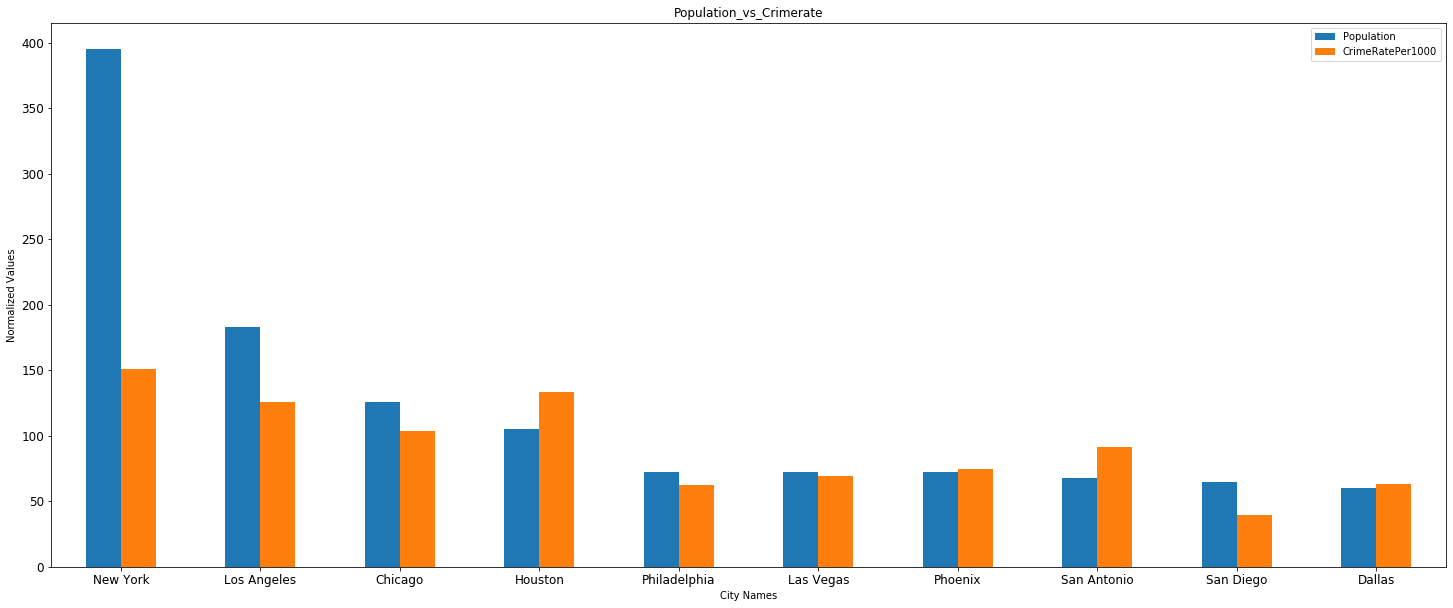

In [203]:
df_bar_plot.plot.bar(x='City', rot=0, title='Population_vs_Crimerate', figsize=(25,10), fontsize=12)
plt.xlabel('City Names')
plt.ylabel('Normalized Values')

In [ ]:
'''
Based on above analysis, it looks like New York would be the right place for new business
Also the crime rate compared to its population seems better than the other states
Going ahead we will explore the restaurants near New York and explore the other options
'''

In [204]:
import requests # library to handle requests
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         241 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0         conda-forge
    geopy:         1.21.0-py_0       conda-forge

The following pa

In [205]:
CLIENT_ID = 'PBZ303U5XJLZC0STVILM3QKPY2JHMT3AHHL2QXUMSZ02A0TB' # your Foursquare ID
CLIENT_SECRET = 'MIVDHANDFD2BBFYFAL02NRUSZXXGRLO5RDYUSNH5LFVHF3JK' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PBZ303U5XJLZC0STVILM3QKPY2JHMT3AHHL2QXUMSZ02A0TB
CLIENT_SECRET:MIVDHANDFD2BBFYFAL02NRUSZXXGRLO5RDYUSNH5LFVHF3JK


In [238]:
address = 'New York City'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
#40.7128° N, 74.0060° W  (New York City)

40.7127281 -74.0060152


In [240]:
search_query = 'Restaurant'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results= requests.get(url).json()


In [246]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.neighborhood
0,3fd66200f964a520d5e31ee3,Jing Fong Restaurant 金豐大酒樓,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1583199256,False,20 Elizabeth St,btwn Bayard & Canal St,40.715881,-73.997209,"[{'label': 'display', 'lat': 40.7158812029412,...",...,United States,"[20 Elizabeth St (btwn Bayard & Canal St), New...",296411,https://www.seamless.com/menu/jing-fong-restau...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,89860853,NaN
1,3fd66200f964a520ece31ee3,Golden Unicorn Restaurant 麒麟金閣,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1583199256,False,18 E Broadway,at Catherine St,40.713629,-73.997230,"[{'label': 'display', 'lat': 40.71362850464683...",...,United States,"[18 E Broadway (at Catherine St), New York, NY...",NaN,NaN,NaN,NaN,NaN,NaN,72966848,NaN
2,49f125dcf964a52091691fe3,O'Hara's Restaurant & Pub,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",v-1583199256,False,120 Cedar St,at Greenwich St.,40.709894,-74.012836,"[{'label': 'display', 'lat': 40.70989378141622...",...,United States,"[120 Cedar St (at Greenwich St.), New York, NY...",NaN,NaN,NaN,NaN,NaN,NaN,93216281,NaN
3,45e5c256f964a52046431fe3,Mudville Restaurant & Tap House,"[{'id': '4bf58dd8d48988d14c941735', 'name': 'W...",v-1583199256,False,126 Chambers St,btwn W Broadway & Church St,40.715336,-74.008881,"[{'label': 'display', 'lat': 40.71533575723845...",...,United States,[126 Chambers St (btwn W Broadway & Church St)...,299726,https://www.seamless.com/menu/mudville-restaur...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,43156651,NaN
4,4a00df67f964a520ba701fe3,Bo Ky Restaurant 波記潮州小食,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1583199256,False,80 Bayard St,at Mott St,40.715696,-73.998667,"[{'label': 'display', 'lat': 40.71569636637641...",...,United States,"[80 Bayard St (at Mott St), New York, NY 10013...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [248]:
dataframe.describe()

,location.lat,location.lng,location.distance
count,30.000000,30.000000,30.000000
mean,40.714424,-74.002001,709.633333
std,0.003660,0.005747,186.919028
min,40.704950,-74.014077,355.000000
25%,40.713685,-74.006844,618.250000
50%,40.715440,-73.998833,717.500000
75%,40.716550,-73.997949,795.750000
max,40.721607,-73.994871,1091.000000


In [249]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories', 'id'] + [col for col in dataframe.columns if col.startswith('location.')]
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,id,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood
0,Jing Fong Restaurant 金豐大酒樓,Dim Sum Restaurant,3fd66200f964a520d5e31ee3,20 Elizabeth St,btwn Bayard & Canal St,40.715881,-73.997209,"[{'label': 'display', 'lat': 40.7158812029412,...",821,10013,US,New York,NY,United States,"[20 Elizabeth St (btwn Bayard & Canal St), New...",NaN
1,Golden Unicorn Restaurant 麒麟金閣,Dim Sum Restaurant,3fd66200f964a520ece31ee3,18 E Broadway,at Catherine St,40.713629,-73.997230,"[{'label': 'display', 'lat': 40.71362850464683...",748,10002,US,New York,NY,United States,"[18 E Broadway (at Catherine St), New York, NY...",NaN
2,O'Hara's Restaurant & Pub,Pub,49f125dcf964a52091691fe3,120 Cedar St,at Greenwich St.,40.709894,-74.012836,"[{'label': 'display', 'lat': 40.70989378141622...",656,10006,US,New York,NY,United States,"[120 Cedar St (at Greenwich St.), New York, NY...",NaN
3,Mudville Restaurant & Tap House,Wings Joint,45e5c256f964a52046431fe3,126 Chambers St,btwn W Broadway & Church St,40.715336,-74.008881,"[{'label': 'display', 'lat': 40.71533575723845...",377,10007,US,New York,NY,United States,[126 Chambers St (btwn W Broadway & Church St)...,NaN
4,Bo Ky Restaurant 波記潮州小食,Chinese Restaurant,4a00df67f964a520ba701fe3,80 Bayard St,at Mott St,40.715696,-73.998667,"[{'label': 'display', 'lat': 40.71569636637641...",702,10013,US,New York,NY,United States,"[80 Bayard St (at Mott St), New York, NY 10013...",NaN
5,Hop Shing Restaurant 合誠茶樓,Dim Sum Restaurant,4b38c437f964a520245025e3,9 Chatham Sq,at E Broadway,40.713932,-73.997930,"[{'label': 'display', 'lat': 40.713932, 'lng':...",695,10038,US,New York,NY,United States,"[9 Chatham Sq (at E Broadway), New York, NY 10...",NaN
6,Deluxe Green Bo Restaurant,Chinese Restaurant,3fd66200f964a520ceea1ee3,66 Bayard St,btwn Elizabeth & Mott St,40.715545,-73.998137,"[{'label': 'display', 'lat': 40.71554491813315...",734,10013,US,New York,NY,United States,"[66 Bayard St (btwn Elizabeth & Mott St), New ...",NaN
7,TJ Byrnes Bar and Restaurant,Restaurant,4b4fdfc8f964a520801827e3,77 Fulton St,Gold St,40.709233,-74.003747,"[{'label': 'display', 'lat': 40.70923312629616...",433,10038,US,New York,NY,United States,"[77 Fulton St (Gold St), New York, NY 10038, U...",NaN
8,Chatham Seafood Restaurant,Dim Sum Restaurant,49c68407f964a52052571fe3,6 Chatham Sq,btwn Mott & Doyers St,40.713885,-73.998266,"[{'label': 'display', 'lat': 40.71388466954485...",666,10038,US,New York,NY,United States,"[6 Chatham Sq (btwn Mott & Doyers St), New Yor...",NaN
9,Puglia Restaurant,Italian Restaurant,3fd66200f964a520ade61ee3,189 Hester St,btwn Mott And Mulberry,40.718165,-73.997822,"[{'label': 'display', 'lat': 40.71816511464507...",918,10013,US,New York,NY,United States,"[189 Hester St (btwn Mott And Mulberry), New Y...",NaN


In [250]:
restaurant_venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the NYC City location

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='NYC City Centre as per Map',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(restaurant_venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(restaurant_venues_map)
   
# display map
restaurant_venues_map